# Mini projet 
## Analyse et Modélisation des Prix des Voitures par Clustering et Régression 
####  I2 Fss - 6 Mai 2024
####  Matiére : Modélisation stochastique  

### Developpé par : Emna Ben Ayed

# 1. Introduction Problématique et Objectifs

## 1.1 Introduction

## 1.2 Problématique

## 1.3 Objectifs

# 2. Méthodologie


## 2.1. Prétraitement des données

## 2.3. Modélisation de la régression 



# 2.2. Clustering

## Évaluation des modèles 

# 3. Exploration de la base de données 

In [1]:
import pandas as pd                                
#Chargement des données
data= pd.read_csv('ford Price.csv',sep=',')
#Aperçu des données
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


## Statistiques descriptives

In [2]:
# Statistiques descriptives pour les variables numériques
numerical_stats = data.describe()

# Statistiques descriptives pour les variables catégorielles
categorical_stats = data.describe(include=['object'])

# Compter les valeurs uniques pour les variables catégorielles
#categorical_counts = data['fuelType'].value_counts()

# Afficher les statistiques descriptives
print("Statistiques descriptives pour les variables numériques :")
print(numerical_stats)
print("\n")

print("Statistiques descriptives pour les variables catégorielles :")
print(categorical_stats)
print("\n")

Statistiques descriptives pour les variables numériques :
               year         price        mileage           tax           mpg  \
count  17966.000000  17966.000000   17966.000000  17966.000000  17966.000000   
mean    2016.866470  12279.534844   23362.608761    113.329456     57.906980   
std        2.050336   4741.343657   19472.054349     62.012456     10.125696   
min     1996.000000    495.000000       1.000000      0.000000     20.800000   
25%     2016.000000   8999.000000    9987.000000     30.000000     52.300000   
50%     2017.000000  11291.000000   18242.500000    145.000000     58.900000   
75%     2018.000000  15299.000000   31060.000000    145.000000     65.700000   
max     2060.000000  54995.000000  177644.000000    580.000000    201.800000   

         engineSize  
count  17966.000000  
mean       1.350807  
std        0.432367  
min        0.000000  
25%        1.000000  
50%        1.200000  
75%        1.500000  
max        5.000000  


Statistiques descript

## Visualisations

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


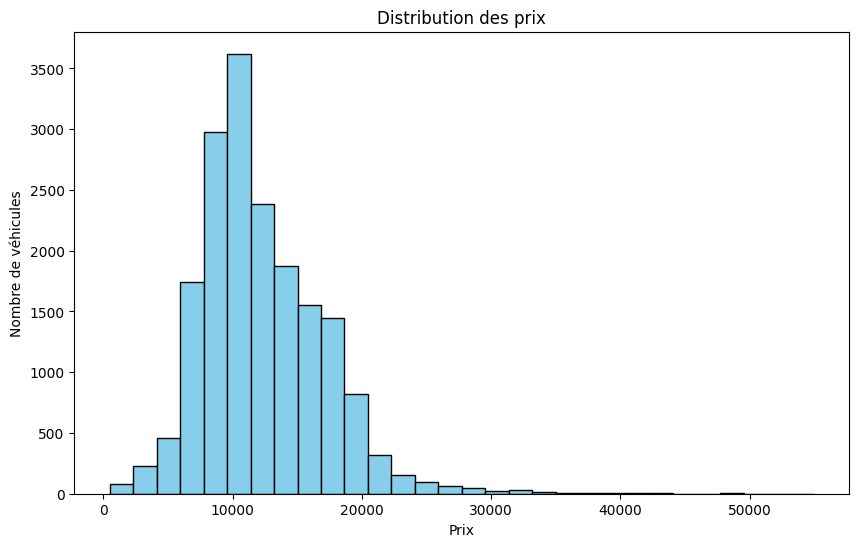

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Afficher un histogramme des prix
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.ylabel('Nombre de véhicules')
plt.show()


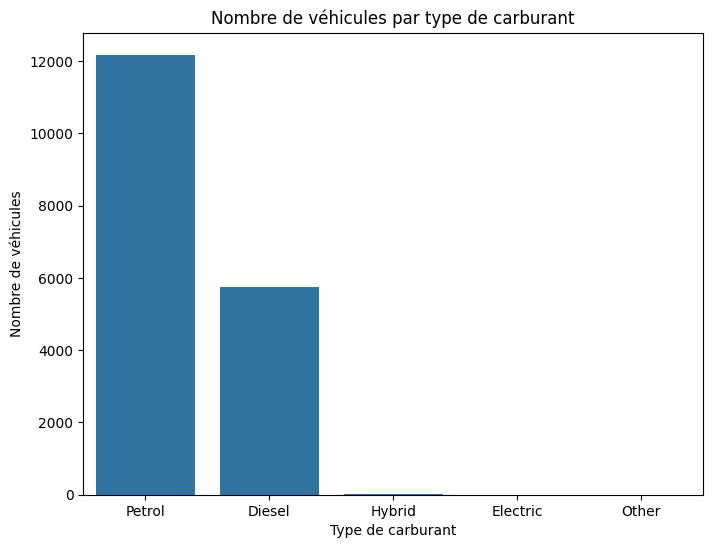

In [4]:
# Tracer un diagramme en barres du type de carburant
plt.figure(figsize=(8, 6))
sns.countplot(x='fuelType', data=data)
plt.title('Nombre de véhicules par type de carburant')
plt.xlabel('Type de carburant')
plt.ylabel('Nombre de véhicules')
plt.show()

# 4. Implémentation(Code Python)

## Prétraitement des données   

In [5]:
# Vérifier les données manquantes
missing_data = data.isnull().sum()
print(missing_data)

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [6]:
# Vérification des types de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Convertir les variables catégorielles en variables indicatrices
data = pd.get_dummies(data)

# Séparer les données en variables explicatives (X) et variable cible (y)
X = data.drop("price", axis=1)
y = data["price"]

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ML 

In [8]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error                 

lr = LinearRegression()
svr_model = SVR(kernel='linear')
poly_svr_model = SVR(kernel='poly')
sigmoid_svr_model = SVR(kernel='sigmoid')
rbf_svr_model = SVR(kernel='rbf')

# Entraîner les modèles
lr.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
poly_svr_model.fit(X_train, y_train)
sigmoid_svr_model.fit(X_train, y_train)
rbf_svr_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_lr = lr.predict(X_test)
y_pred_svr = svr_model.predict(X_test)
y_pred_poly_svr = poly_svr_model.predict(X_test)
y_pred_sigmoid_svr = sigmoid_svr_model.predict(X_test)
y_pred_rbf_svr = rbf_svr_model.predict(X_test)

# Évaluer le modèle
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_svr = r2_score(y_test, y_pred_svr)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
r2_poly_svr = r2_score(y_test, y_pred_poly_svr)
rmse_poly_svr = mean_squared_error(y_test, y_pred_poly_svr, squared=False)
r2_sigmoid_svr = r2_score(y_test, y_pred_sigmoid_svr)
rmse_sigmoid_svr = mean_squared_error(y_test, y_pred_sigmoid_svr, squared=False)
r2_rbf_svr = r2_score(y_test, y_pred_rbf_svr)
rmse_rbf_svr = mean_squared_error(y_test, y_pred_rbf_svr, squared=False)

print(" **** Performance de la Régression Linéaire *****")
print(f"R²: {r2_lr}")
print(f"RMSE: {rmse_lr}")
print(" **** Performance de la Régression (SVR) avec noyau linéaire *****")
print(f"R²: {r2_svr}")
print(f"RMSE: {rmse_svr}")
print(" **** Performance de Regression (SVR) avec noyau polynomial **** ")
print(f"R²: {r2_poly_svr}")
print(f"RMSE: {rmse_poly_svr}")
print(" **** Performance de Regression (SVR) avec noyau sigmoid **** ")
print(f"R²: {r2_sigmoid_svr}")
print(f"RMSE: {rmse_sigmoid_svr}")
print(" **** Performance de Regression (SVR) avec noyau rbf **** ")
print(f"R²: {r2_rbf_svr}")

 **** Performance de la Régression Linéaire *****
R²: 0.8458379497303286
RMSE: 1858.7866574001462
 **** Performance de la Régression (SVR) avec noyau linéaire *****
R²: 0.8343237024941151
RMSE: 1926.9524492945811
 **** Performance de Regression (SVR) avec noyau polynomial **** 
R²: 0.16883225906899557
RMSE: 4316.0368817286
 **** Performance de Regression (SVR) avec noyau sigmoid **** 
R²: 0.15842632108243648
RMSE: 4342.970502360627
 **** Performance de Regression (SVR) avec noyau rbf **** 
R²: 0.09482263012612469


In [9]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Construire le modèle
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))  # Couche cachée avec 64 neurones, fonction d'activation ReLU
model.add(Dense(1))  # Couche de sortie avec une seule sortie pour la régression

# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error')  # Utilisation de l'optimiseur Adam et de l'erreur quadratique moyenne pour la régression

# Entraîner le modèle
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)  # 50 époques, batch_size de 32

# Faire des prédictions sur l'ensemble de test
y_pred_nn = model.predict(X_test)

# Évaluer le modèle
r2_nn = r2_score(y_test, y_pred_nn)
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)

print(" **** Performance de Réseau de Neurones **** ")
print(f"R²: {r2_nn}")
print(f"RMSE: {rmse_nn}")

Epoch 1/50


C:\Users\ASUS\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - loss: 171537344.0000
Epoch 2/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 171555440.0000
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 165523040.0000
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 151852832.0000
Epoch 5/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 139678192.0000
Epoch 6/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 123087000.0000
Epoch 7/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 107979776.0000
Epoch 8/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 91164296.0000
Epoch 9/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 76505392.0000
Epoch 10/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 63012888.0000
Epoch 11/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 50270084.0000
Epoch 12/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 39543024.0000
Epoch 13/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 31700070.0000
Epoch 14/50


## Clustering avec l'algorithme EM 

In [10]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Sélectionner des variables pour le clustering
X = data[['year','engineSize','price']]

# Initialiser et entraîner le modèle EM avec 2 clusters
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)

# Prédire les clusters pour chaque exemple
cluster_labels = gmm.predict(X)

# Ajouter les étiquettes des clusters à l'ensemble de données
data_clustered = data.copy()
data_clustered['cluster'] = cluster_labels

# Afficher les statistiques des clusters
print("Statistiques du cluster 0:")
print(data_clustered[data_clustered['cluster'] == 0]['price'].describe())
print("\nStatistiques du cluster 1:")
print(data_clustered[data_clustered['cluster'] == 1]['price'].describe())

Statistiques du cluster 0:
count     9323.000000
mean      8953.832350
std       2142.536817
min        495.000000
25%       7695.000000
50%       9289.000000
75%      10497.500000
max      15999.000000
Name: price, dtype: float64

Statistiques du cluster 1:
count     8643.000000
mean     15866.891589
std       4120.438193
min       3990.000000
25%      13195.000000
50%      15495.000000
75%      17920.000000
max      54995.000000
Name: price, dtype: float64


# Regression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Boucler sur chaque cluster
for cluster_id in range(2):
    # Sélectionner les données du cluster actuel
    cluster_data = data_clustered[data_clustered['cluster'] == cluster_id]
    X_cluster = cluster_data.drop(['price', 'cluster'], axis=1)
    y_cluster = cluster_data['price']

    # Diviser les données en ensemble d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Créer et entraîner le modèle de régression linéaire sur l'ensemble d'entraînement du cluster actuel
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Faire des prédictions sur l'ensemble de test du cluster actuel
    y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import r2_score, mean_squared_error

# Boucler sur chaque cluster
for cluster_id in range(2): 
    # Sélectionner les données du cluster actuel
    cluster_data = data_clustered[data_clustered['cluster'] == cluster_id]
    X_cluster = cluster_data.drop(['price', 'cluster'], axis=1)
    y_cluster = cluster_data['price']

    # Créer et entraîner le modèle de régression linéaire
    model = LinearRegression()
    model.fit(X_cluster, y_cluster)

    # Faire des prédictions sur les données du cluster
    y_pred = model.predict(X_cluster)

    # Calculer les métriques d'évaluation
    r2 = r2_score(y_cluster, y_pred)
    rmse = mean_squared_error(y_cluster, y_pred, squared=False)

    # Afficher les résultats
    print(f"Cluster {cluster_id}:")
    print(f"    R²: {r2}")
    print(f"    RMSE: {rmse}")
    print("\n")


Cluster 0:
    R²: 0.8190778880124738
    RMSE: 911.2778730401628


Cluster 1:
    R²: 0.8025612000074706
    RMSE: 1830.7731309912906




In [13]:
from sklearn.linear_model import LinearRegression

# Boucler sur chaque cluster
for cluster_id in range(2):  # Assuming 2 clusters
    # Sélectionner les données du cluster actuel
    cluster_data = data_clustered[data_clustered['cluster'] == cluster_id]
    X_cluster = cluster_data.drop(['price', 'cluster'], axis=1)
    y_cluster = cluster_data['price']

    # Créer et entraîner le modèle de régression linéaire
    model = LinearRegression()
    model.fit(X_cluster, y_cluster)

    # Faire des prédictions sur les données du cluster
    y_pred = model.predict(X_cluster)

    # Afficher les vrais prix et les prix prédits
    print(f"Cluster {cluster_id}:")
    for i in range(len(y_cluster)):
        print(f"    Vrai prix: {y_cluster.iloc[i]}, Prix prédit: {y_pred[i]}")
    print("\n")


Cluster 0:
    Vrai prix: 12000, Prix prédit: 10649.243425888824
    Vrai prix: 10500, Prix prédit: 7207.56683484104
    Vrai prix: 9000, Prix prédit: 9889.970156849828
    Vrai prix: 10000, Prix prédit: 10195.400572583429
    Vrai prix: 11561, Prix prédit: 10553.39998405485
    Vrai prix: 11000, Prix prédit: 9404.470841399278
    Vrai prix: 10999, Prix prédit: 9838.229198927642
    Vrai prix: 12500, Prix prédit: 10800.912321874406
    Vrai prix: 9499, Prix prédit: 10296.382949976949
    Vrai prix: 10500, Prix prédit: 9726.712231321493
    Vrai prix: 8995, Prix prédit: 9676.675104715745
    Vrai prix: 6795, Prix prédit: 7291.750209502643
    Vrai prix: 8299, Prix prédit: 8181.671172085102
    Vrai prix: 8699, Prix prédit: 9340.275438838638
    Vrai prix: 7999, Prix prédit: 7165.924179738504
    Vrai prix: 8991, Prix prédit: 9667.20988504903
    Vrai prix: 7236, Prix prédit: 6627.259244150366
    Vrai prix: 9814, Prix prédit: 10635.321271908702
    Vrai prix: 8261, Prix prédit: 8219.394

    Vrai prix: 5769, Prix prédit: 7772.052636262961
    Vrai prix: 5328, Prix prédit: 8818.170740024187
    Vrai prix: 2995, Prix prédit: 1539.0611762931803
    Vrai prix: 9799, Prix prédit: 9799.778210797347
    Vrai prix: 11799, Prix prédit: 10743.766300797462
    Vrai prix: 4795, Prix prédit: 5071.366306630778
    Vrai prix: 2495, Prix prédit: 2635.8193850327516
    Vrai prix: 2395, Prix prédit: 2827.1766813040012
    Vrai prix: 5975, Prix prédit: 6884.17250747513
    Vrai prix: 5275, Prix prédit: 5900.479918189347
    Vrai prix: 6275, Prix prédit: 7527.29555506527
    Vrai prix: 5975, Prix prédit: 6304.658710130607
    Vrai prix: 7990, Prix prédit: 8785.229611131479
    Vrai prix: 5990, Prix prédit: 5704.85291669576
    Vrai prix: 9990, Prix prédit: 9495.079638006864
    Vrai prix: 5995, Prix prédit: 5803.76097911573
    Vrai prix: 4995, Prix prédit: 5089.12424262648
    Vrai prix: 5495, Prix prédit: 5317.115100297146
    Vrai prix: 3990, Prix prédit: 4291.144013928366
    Vrai pri

    Vrai prix: 17500, Prix prédit: 17080.427007115446
    Vrai prix: 40000, Prix prédit: 38614.58555827569
    Vrai prix: 25000, Prix prédit: 22572.030375728384
    Vrai prix: 13100, Prix prédit: 13205.193331094924
    Vrai prix: 16595, Prix prédit: 18367.215018927585
    Vrai prix: 14000, Prix prédit: 14653.984568264801
    Vrai prix: 30000, Prix prédit: 26153.36381690204
    Vrai prix: 17979, Prix prédit: 16841.766656202264
    Vrai prix: 14679, Prix prédit: 14570.437054947019
    Vrai prix: 19279, Prix prédit: 16599.804869689047
    Vrai prix: 10479, Prix prédit: 11944.87232177006
    Vrai prix: 13990, Prix prédit: 16063.135686006863
    Vrai prix: 13000, Prix prédit: 14729.195760786999
    Vrai prix: 12990, Prix prédit: 13911.220267181285
    Vrai prix: 14795, Prix prédit: 15249.15851297602
    Vrai prix: 17495, Prix prédit: 16299.329342420679
    Vrai prix: 14495, Prix prédit: 15329.180449540261
    Vrai prix: 14750, Prix prédit: 15456.285218764562
    Vrai prix: 15990, Prix prédi

    Vrai prix: 17499, Prix prédit: 15750.854578191414
    Vrai prix: 14399, Prix prédit: 15996.230082094204
    Vrai prix: 17999, Prix prédit: 17114.690215848852
    Vrai prix: 10800, Prix prédit: 11766.552640799899
    Vrai prix: 11200, Prix prédit: 13574.066722561605
    Vrai prix: 15500, Prix prédit: 15185.045068194158
    Vrai prix: 13000, Prix prédit: 13928.715593236033
    Vrai prix: 15400, Prix prédit: 14487.207844741642
    Vrai prix: 16500, Prix prédit: 14783.606958636083
    Vrai prix: 14800, Prix prédit: 16413.771625685506
    Vrai prix: 14800, Prix prédit: 13976.32252132427
    Vrai prix: 14000, Prix prédit: 14927.677251658402
    Vrai prix: 14500, Prix prédit: 12780.869009646121
    Vrai prix: 14500, Prix prédit: 14240.794857326895
    Vrai prix: 10750, Prix prédit: 13448.360219934955
    Vrai prix: 14999, Prix prédit: 13631.669749157969
    Vrai prix: 19199, Prix prédit: 19640.99581125332
    Vrai prix: 22599, Prix prédit: 21210.321637112647
    Vrai prix: 13699, Prix pré

# 6. Conclusion 